<a href="https://colab.research.google.com/github/gauravraidata/IITJ-projects/blob/main/Linear_Autoencoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.08MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.95MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.79MB/s]


In [4]:
dataitter = iter(data_loader)
images, labels = next(dataitter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
      super(Autoencoder, self).__init__()
      self.encoder = nn.Sequential(
          nn.Linear(28*28, 128),
          nn.ReLU(),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 12),
          nn.ReLU(),
          nn.Linear(12, 3)
      )

      self.decoder = nn.Sequential(
          nn.Linear(3, 12),
          nn.ReLU(),
          nn.Linear(12, 64),
          nn.ReLU(),
          nn.Linear(64, 128),
          nn.ReLU(),
          nn.Linear(128, 28*28),
          nn.Sigmoid()
      )

    def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded


In [6]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [7]:
epochs = 10
outputs = []
for epoch in range(epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, epochs, loss.item()))
    outputs.append((epoch, img, output))


epoch [1/10], loss:0.0527
epoch [2/10], loss:0.0510
epoch [3/10], loss:0.0457
epoch [4/10], loss:0.0416
epoch [5/10], loss:0.0392
epoch [6/10], loss:0.0384
epoch [7/10], loss:0.0428
epoch [8/10], loss:0.0330
epoch [9/10], loss:0.0378
epoch [10/10], loss:0.0341


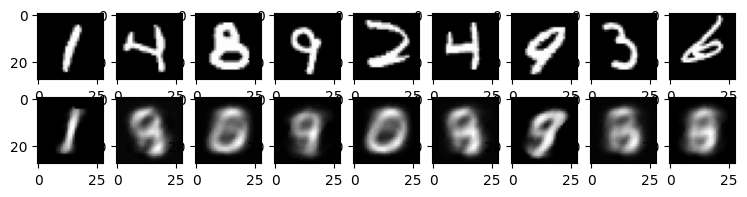

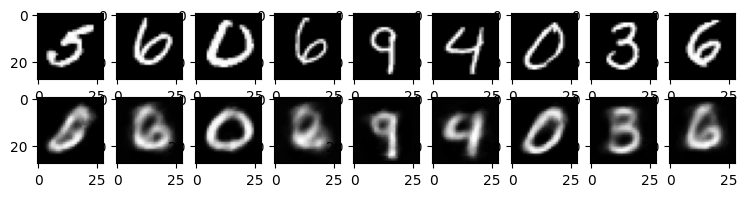

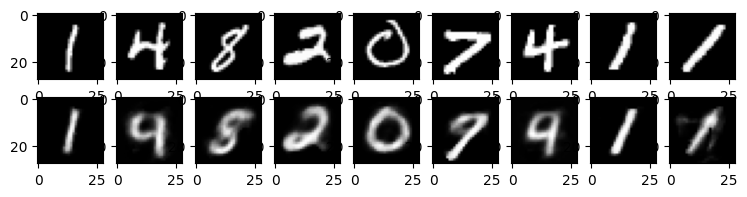

In [9]:
for k in range(0, epochs, 4):
  plt.figure(figsize=(9, 2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])